In [10]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import HTML


In [4]:
da_low = xr.open_dataarray("../data/01_raw/nextgems/sst_global_100km.nc")
# da_high = xr.open_dataarray("../data/01_raw/nextgems/ws_global_10km.nc")
da_low

<xarray.DataArray 'sst' (time: 168, lat: 180, lon: 360)> Size: 87MB
[10886400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 2040-09-01 ... 2040-09-07T23:00:00
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Attributes: (12/14)
    paramId:                    34
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    units:                      K
    name:                       Sea surface temperature
    cfVarName:                  sst
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [5]:
da_low.isel(time=10).fillna(0)

<xarray.DataArray 'sst' (lat: 180, lon: 360)> Size: 518kB
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [271.652771  , 271.65386963, 271.65496826, ..., 271.64331055,
        271.64422607, 271.64715576],
       [271.61297607, 271.60809326, 271.60321045, ..., 271.5993042 ,
        271.605896  , 271.61248779],
       [271.57269287, 271.57269287, 271.57147217, ..., 271.57196045,
        271.57196045, 271.57147217]])
Coordinates:
    time     datetime64[ns] 8B 2040-09-01T10:00:00
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Attributes: (12/14)
    paramId:                    34
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    units:                      K
    name:                       Sea surface temperature
    cfVarName:                  sst
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [6]:
def animate(da: xr.DataArray) -> animation:
    fig, ax = plt.subplots(1, 1, figsize=[12,6])
    vmin = float(da.min())
    vmax = float(da.max())
    def plot_step(time):
        """Plot a time step of the animation."""
        da.isel(time=time).plot(ax=ax, add_colorbar=False,  vmin=vmin, vmax=vmax)
    return animation.FuncAnimation(fig, plot_step, 168, interval=50, blit=False)

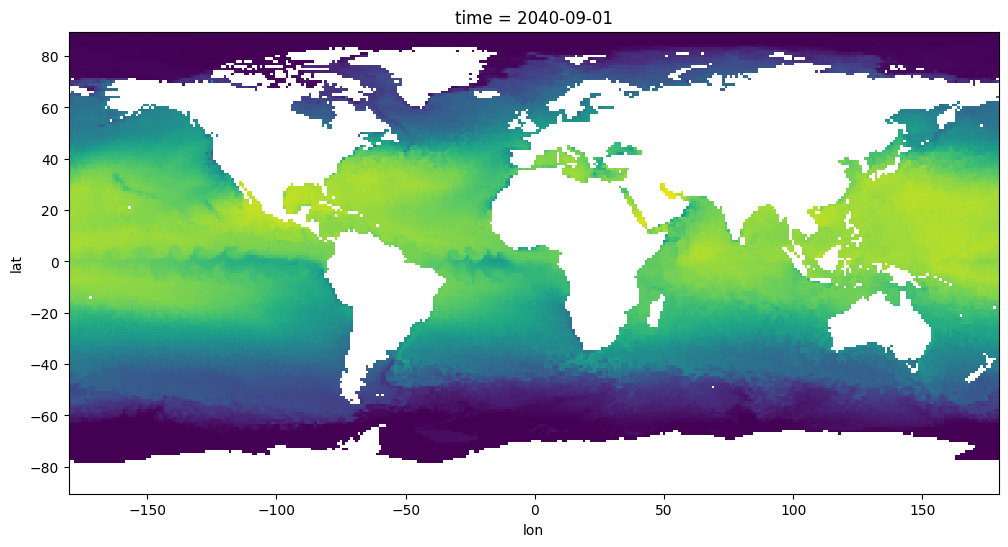

In [11]:
ani = animate(da_low)

In [12]:
writer = animation.FFMpegWriter(fps=20)
ani.save("sst_low.mp4", writer=writer)

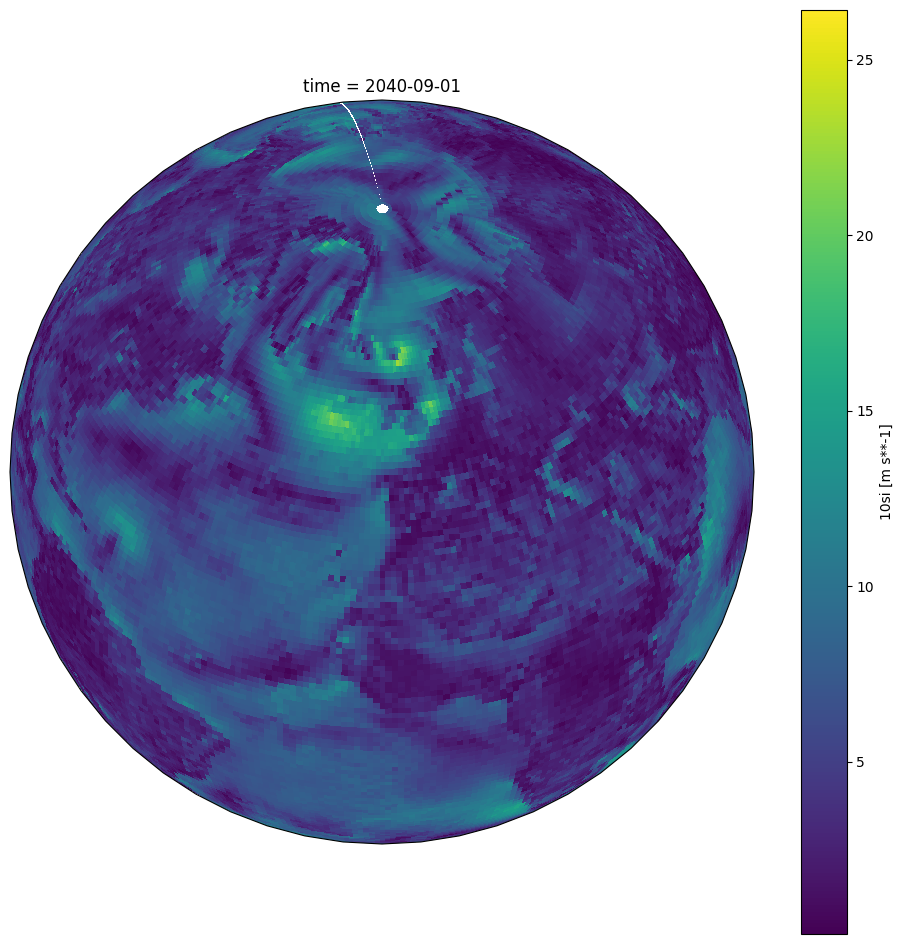

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))
da_low.sel(time='2040-09-01 00:00:00').plot.imshow(ax=ax, transform=ccrs.PlateCarree())

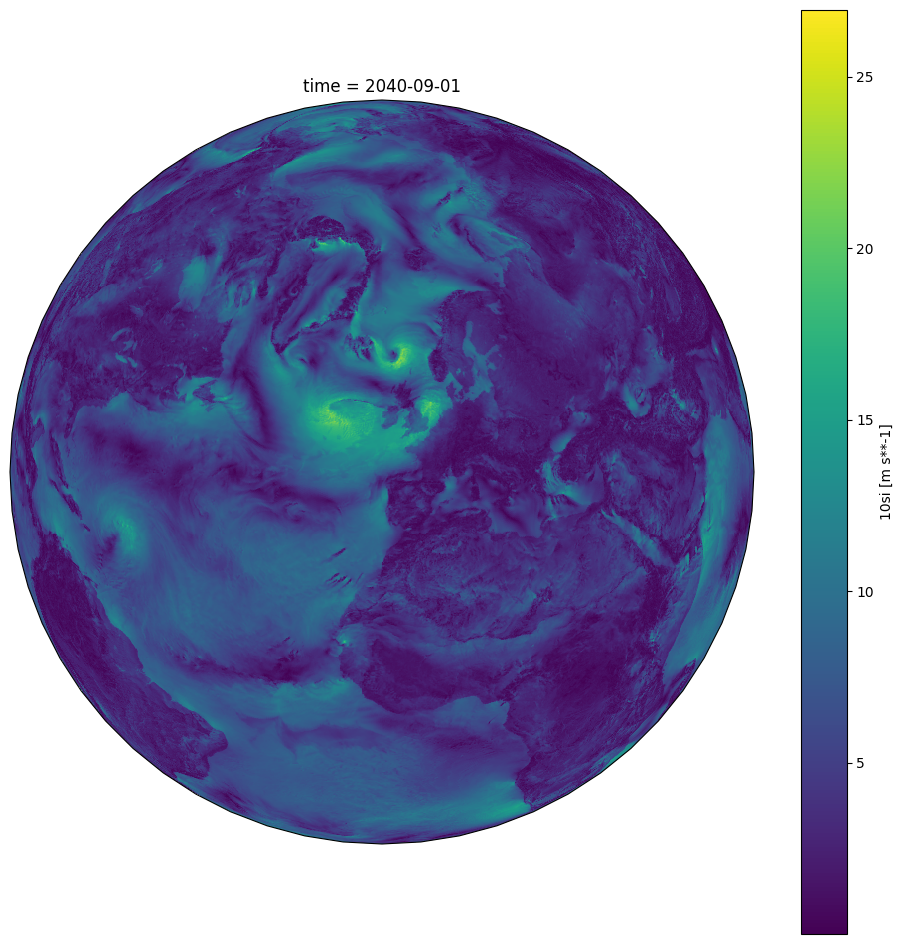

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))
da_high.sel(time='2040-09-01 00:00:00').plot.imshow(ax=ax, transform=ccrs.PlateCarree())

In [ ]:
fig = plt.figure(figsize=(12, 12))


def plot_step(frame, fig):
    """Plot a time step of the animation."""
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0+frame, 30))
    da_low.isel(time=frame%120).plot.imshow(add_colorbar=False, ax=ax, cmap="viridis", transform=ccrs.PlateCarree())
    ax.set_title("")

ani = animation.FuncAnimation(fig, plot_step, 360, interval=50, blit=False, fargs=(fig,))

In [9]:
HTML(ani.to_html5_video())

In [10]:
ani.save('globe_ws_low_res.mp4')

In [39]:
def animate(da: xr.DataArray) -> animation.ArtistAnimation:
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 30))

    vmin = float(da.min())
    vmax = float(da.max())

    ims = []

    for i in tqdm(range(168)):
        im = da.isel(time=i).plot.imshow(
            add_colorbar=False,
            ax=ax,
            cmap="viridis",
            transform=ccrs.PlateCarree(),
            animated=True,
            vmin=vmin,
            vmax=vmax,
        )
        ax.set_title("")
        ims.append([im])

    return animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

100%|██████████| 168/168 [01:01<00:00,  2.71it/s]


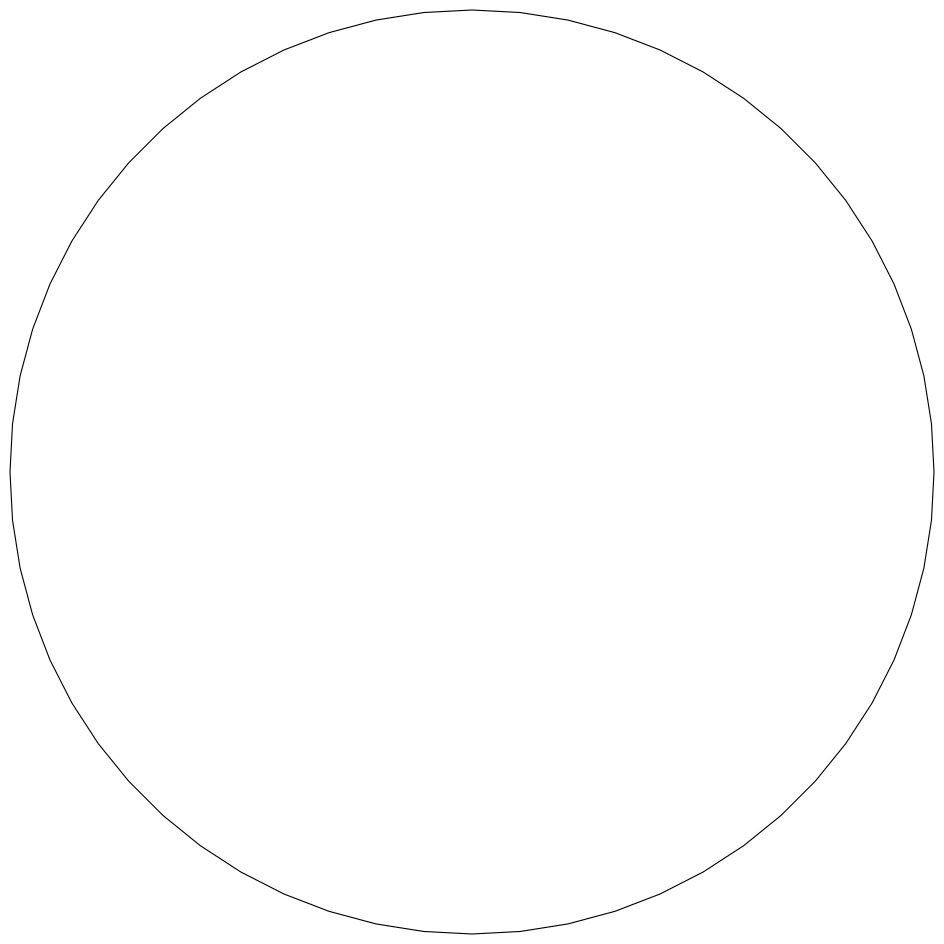

In [40]:
ani = animate(da_low)

In [41]:
writer = animation.FFMpegWriter(fps=20)
ani.save("globe_ws_low_res_rot.mp4", writer=writer)

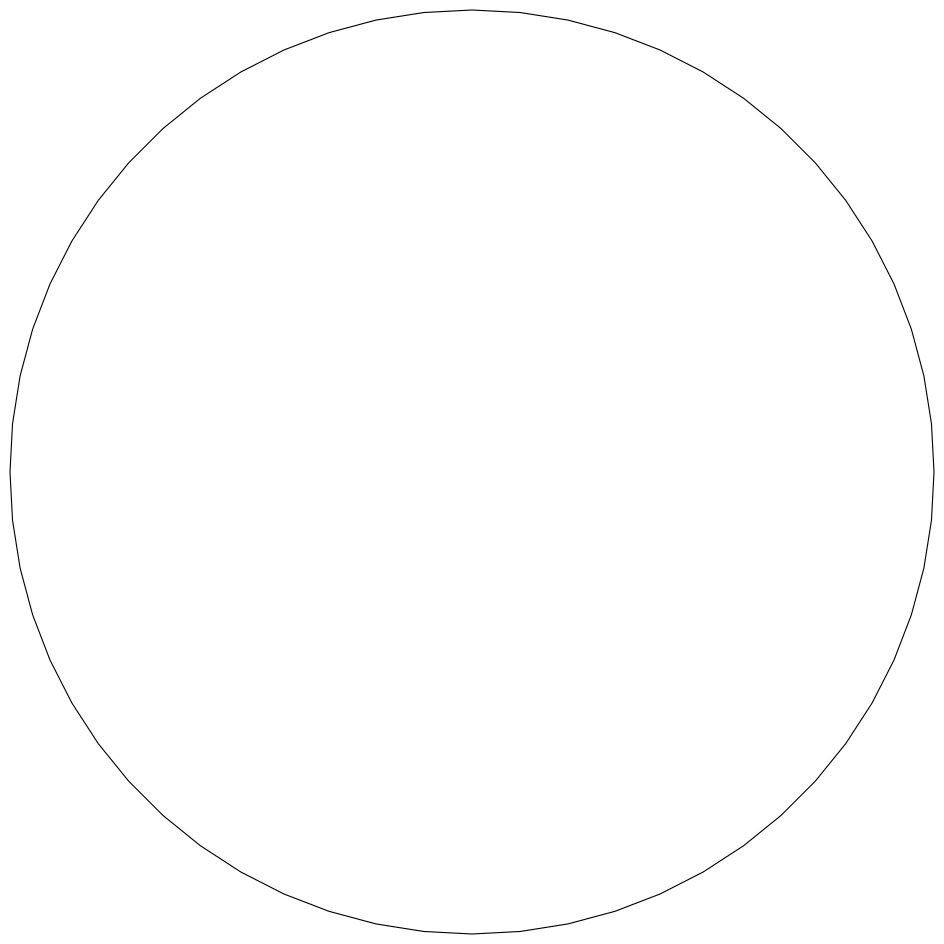

In [45]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 30))

In [ ]:


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 30))

vmin = float(da_low.min())
vmax = float(da_low.max())
mesh = da_low.isel(time=0).plot(
    add_colorbar=False,
    ax=ax,
    cmap="viridis",
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax,
)


def update_mesh(t, fig):
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(t, 30))
    mesh.set_array(da_low.isel(time=t % 168))


anim = animation.FuncAnimation